# Hierarchical model (Bayesian Statistical Inference)
The number of daily calls a company’s customer service receives can be modeled by a Poisson process with average $\Lambda$. A proportion $P_{C}$ of the calls received are complaints, while the rest are to ask information on some product.

**a)** Estimate $P_{C}$ and $\Lambda$ if one day $150$ calls are received and $50$ of them are to complain.

**b)** Repeat the previous section if it is known that only $50$ complaints have been received in one day, but not the total number of calls.

**- Solutions**

**a)** From a Bayesian approach, with the data collected $D$ consisting of $n = 150$ calls, from which $c = 50$ are complaints, all received in a specific day, the number of daily calls received $N$ can be modeled by a Poisson distribution: 
$$N \sim P_{o}(\Lambda)$$
where $\Lambda$ is the parameter to be obtained from the Poisson distribution (in other words, the average daily calls received where $\lambda$ is an undetermined specific value). From this, the proportion of daily complaint calls $P_{C}$ can be calculated through $C$ (the daily complaint calls) which leads to this hierarchical model $\Lambda,C \rightarrow N \rightarrow n,c$. Therefore, using the Bayes' Rule, the posterior mass function, $P(\Lambda, C|n,c)$, dependent on the hyperparameters $\Lambda$ and $C$ and conditioned on the data sample $D$, can be expressed in this manner:
$$ P(\Lambda, C|n, c) \propto P(n, c|\Lambda = \lambda, C = c)P(\Lambda = \lambda, C = c), $$
which depends on its likelihood $P(n, c|\Lambda = \lambda, C = c)$, considering the probabilistic method of data obtainment to quantify the assistance provided by $D$ for the hypothesis that $\Lambda = \lambda$ and $C = c$, along with its prior function, which quantifies how likely it was that $\Lambda$ and $C$ were $\lambda$ and $c$, respectively, even before the data was collected. The likelihood function $P(n, c|\Lambda = \lambda, C = c)$ assigns a probability of observing the data to each possible combination of the hyperparameters $\Lambda$ and $C$, which, by assuming independent data among them and using general probability rules, it can be defined as follows:
$$P(n, c|\Lambda = \lambda, C = c) = P(n|\Lambda = \lambda, C = c)P(c|\Lambda = \lambda, C = c), $$
where $\Lambda$ and $C$ do not depend directly on $n$ and $c$, but depend on $N$, thus:
$$P(n|\Lambda = \lambda, C = c) = P(n|N \sim P_{o}(\Lambda)), $$
$$P(c|\Lambda = \lambda, C = c) = P(c|N \sim P_{o}(\Lambda)). $$
Assuming that the hyperparameters $\Lambda$ and $C$ are independent of each other, the prior function $P(\Lambda = \lambda, C = c)$ can be expressed as:
$$P(\Lambda = \lambda, C = c) = P(\Lambda = \lambda)P(C = c), $$
where, if a generous uncertainty is considered (imposing diffuse priors with the indifference principle), informed discrete uniform distributions over a set of logically possible values for both hyperparameters are taken into account, in this manner:
$$P(\Lambda = \lambda) \sim \mathrm{DiscreteUnif}(0, 200), $$
$$P(C = c) \sim \mathrm{DiscreteUnif}(0, N). $$
Having said that, the MCMC method can be used with the Python modules *ArviZ* and *PyMC* in the same manner as in the previous exercise, but now, for different values of $\Lambda$, $N$ (to obtain $P_{C}$) and $C$:

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [$\Lambda$]
>Metropolis: [N]
>Metropolis: [C]


Output()

Sampling 4 chains for 1_000 tune and 50_000 draw iterations (4_000 + 200_000 draws total) took 67 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$\Lambda$,100.531,7.104,87.0,113.0,0.049,0.027,20810.0,34259.0,1.0
N,100.629,12.345,76.0,122.0,0.089,0.051,19190.0,29220.0,1.0
C,50.405,30.162,0.0,98.0,0.156,0.074,36616.0,39401.0,1.0


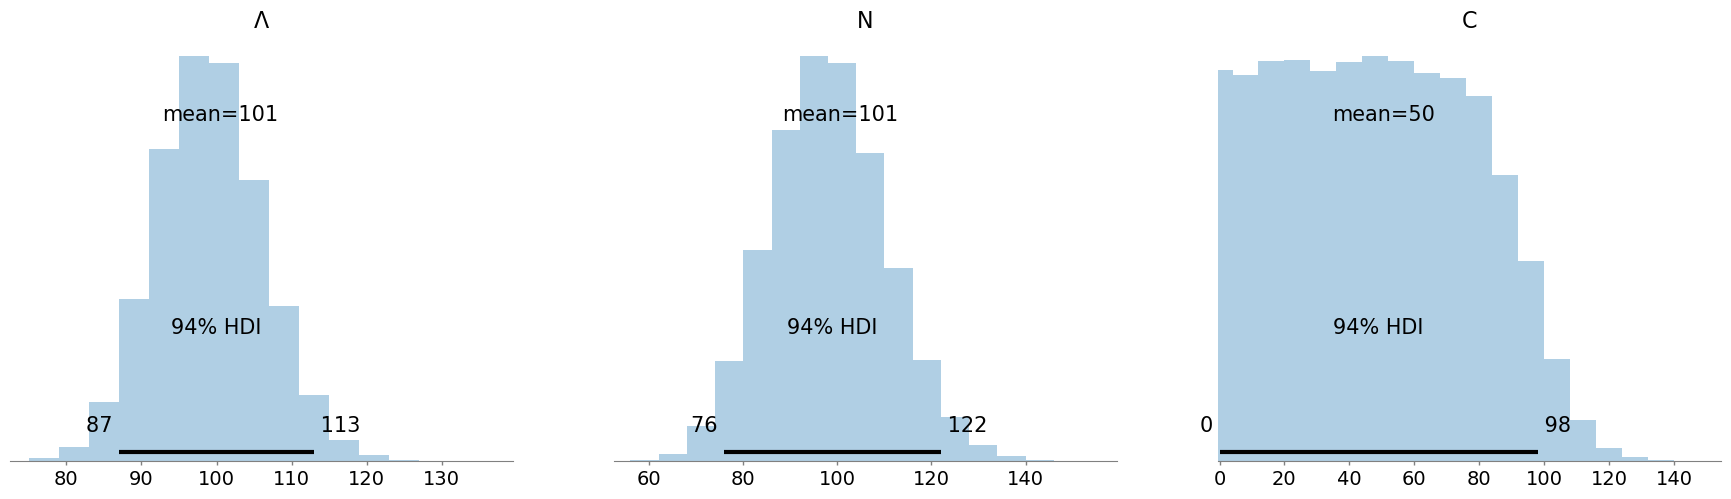

In [1]:
import arviz as az
import pymc as pm
#Bayesian model definition
with pm.Model() as model:
    Lambda = pm.DiscreteUniform(r"$\Lambda$", lower = 0, upper = 200) #Prior function P(Lambda = lambda) (Note: 200 is chosen for the upper bound due to proximity to the available data)
    N = pm.Poisson("N", Lambda) #Model for the behaviour of the number of daily calls
    Observed_data = pm.Poisson("Observed_data_1", Lambda, observed = 150)*pm.Poisson("Observed_data_2", Lambda, observed = 50) #Likelihood function P(n, c|Lambda = lambda, C = c)
    C = pm.DiscreteUniform("C", lower = 0, upper = N) #Prior function P(C = c)
#Compute MCMC sampling
with model:
    trace = pm.sample(50000) #High number of iterations for good convergence in the method
az.plot_posterior(trace, var_names=[r"$\Lambda$", "N", "C"]) #Plot of the results
pm.summary(trace, var_names=[r"$\Lambda$", "N", "C"]) #Results summary

resulting, in summary, in $\Lambda \approx [87, 113]$ average daily calls for a $97$% HDI interval with a mean of $\sim 100$ and a SD of $\sim 7$, and $P_{C} = \frac{C}{N} \approx [0, 0.80]$ proportion of daily complaint calls for a $97$% HDI interval with a mean of $\sim 0.50$ and a SD of $\sim \sqrt{\left (\frac{\mathrm{SD}_{C}}{\mathrm{mean}_{N}} \right)^{2} + \left (-\frac{mean_{C} SD_{N}}{mean_{N}^{2}}\right )^{2}} \approx 0.31$ (using the formula for uncertainty analysis for mostly independent variables).

**b)** The situation in this section can be modeled in the same manner as in the previous one, using the same Bayesian approach, parameters, and hyperparameters, with the only difference being that the available data $D$ now consists of $c = 50$ complaint calls received in a specific day, which modifies the hierarchical model of the last section into: $\Lambda,C \rightarrow N \rightarrow c$. Therefore, using the Bayes' Rule, it results in a posterior mass function $P(\Lambda, C|c)$ of the following form:
$$ P(\Lambda, C|c) \propto P(c|\Lambda = \lambda, C = c)P(\Lambda = \lambda, C = c), $$
where the prior function $P(\Lambda = \lambda, C = c)$ remains the same as in the previous section, and the likelihood function $P(c|\Lambda = \lambda, C = c)$ can be expressed in the same manner as in the last section:
$$P(c|\Lambda = \lambda, C = c) = P(c|N \sim P_{o}(\Lambda)). $$
With that said, the MCMC method can be used again with the Python modules *ArviZ* and *PyMC* in the same fashion as in the previous section:

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [$\Lambda$]
>Metropolis: [N]
>Metropolis: [C]


Output()

Sampling 4 chains for 1_000 tune and 50_000 draw iterations (4_000 + 200_000 draws total) took 70 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$\Lambda$,50.999,7.194,38.0,64.0,0.064,0.034,12825.0,23169.0,1.0
N,50.977,10.171,33.0,70.0,0.094,0.052,11744.0,19827.0,1.0
C,25.448,16.110,0.0,52.0,0.090,0.052,32113.0,33724.0,1.0


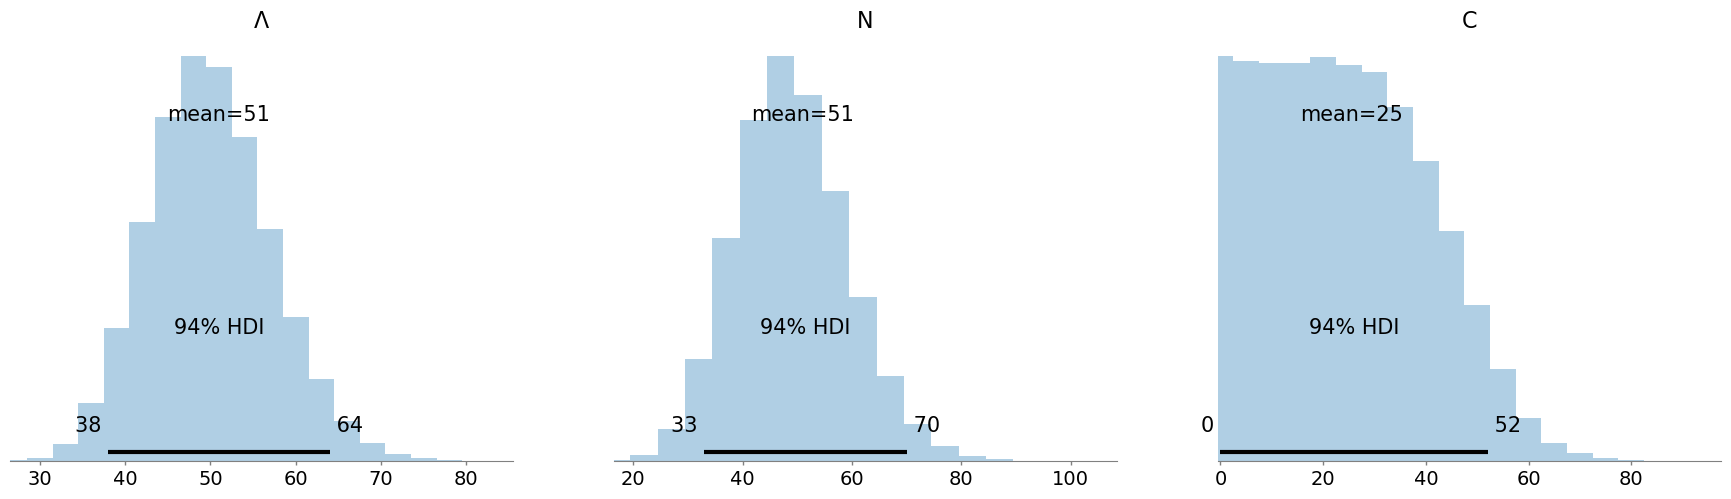

In [2]:
#Bayesian model definition
with pm.Model() as model:
    Lambda = pm.DiscreteUniform(r"$\Lambda$", lower = 0, upper = 200) #Prior function P(Lambda = lambda) (Note: 200 is chosen for the upper bound due to proximity to the available data)
    N = pm.Poisson("N", Lambda) #Model for the behaviour of the number of daily calls
    Observed_data = pm.Poisson("Observed_data", Lambda, observed = 50) #Likelihood function P(c|Lambda = lambda, C = c)
    C = pm.DiscreteUniform("C", lower = 0, upper = N) #Prior function P(C = c)
#Compute MCMC sampling
with model:
    trace = pm.sample(50000) #High number of iterations for good convergence in the method
az.plot_posterior(trace, var_names=[r"$\Lambda$", "N", "C"]) #Plot of the results
pm.summary(trace, var_names=[r"$\Lambda$", "N", "C"]) #Results summary

resulting, in summary, in $\Lambda \approx [38, 64]$ average daily calls for a $97$% HDI interval with a mean of $\sim 51$ and a SD of $\sim 7$, and $P_{C} = \frac{C}{N} \approx [0, 0.75]$ proportion of daily complaint calls for a $97$% HDI interval with a mean of $\sim 0.51$, and a SD of $\sim 0.33$ (using the same formula for uncertainty analysis for mostly independent variables as before). Reasonably, the results for $P_{C}$ are similar in form and magnitude to those in the previous section, given that related data is available for them, nevertheless, in the case of $\Lambda$, the results are similar in form but not in magnitude, due to related data not being collected of them.